<h1 align = "center">Work with Pandas & Matplotlib</h1>

#### import essential modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from openpyxl import load_workbook

#### read data

In [2]:
professors = pd.read_excel("Database.xlsx", sheet_name="Sheet1")
professors = professors.rename(columns={"ID": "Prof_ID", "Name":"Prof_Name"})
professors

,Prof_ID,Prof_Name
0,9987,Mahmood Hosseini
1,9786,Hamide Razavi
2,9685,Majid Salari
3,9097,Rahele Yari
4,9543,Hamidreza Koosha
5,9954,Yaser Bani Hashemi
6,9394,Frazad Dehghanian
7,9196,Babak Rezaee
8,9026,Alireza Shadman
9,9172,Mohammad Ranjbar


In [3]:
prof_specialties = pd.read_excel("Database.xlsx", sheet_name="Sheet2")
prof_specialties = prof_specialties.rename(columns={"Prof ID":"Prof_ID", "Spec ID":"Spec_ID"})
prof_specialties

,Prof_ID,Spec_ID,Priority
0,9987,1,1
1,9786,3,1
2,9786,5,2
3,9786,6,3
4,9543,7,2
5,9543,5,1
6,9954,7,1
7,9394,4,1
8,9196,7,1
9,9026,3,1


In [4]:
specialties = pd.read_excel("Database.xlsx", sheet_name="Sheet3")
specialties = specialties.rename(columns={"Spec ID":"Spec_ID", "Name": "Spec_Name"})
specialties

,Spec_ID,Spec_Name
0,1,Optimization
1,2,Simulation
2,3,Logistic
3,4,Financial Systems
4,5,Project Control
5,6,Data Anaylsis
6,7,Fuzzy Logic
7,8,Queuing Theory


In [5]:
students = pd.read_excel("Database.xlsx", sheet_name="Sheet4")
students = students.rename(columns={"Student ID":"Stu_ID", "Name":"Stu_Name", "Thesis Topic":"Thesis_Topic",
                                    "Approval Date":"Approval_Date", "Defense Date":"Defense_Date"})
students["Stu_ID"] = students["Stu_ID"].astype(str)
students

,Stu_ID,Stu_Name,Degree,Thesis_Topic,Approval_Date,Defense_Date,Grade
0,9822743012,Abbasi,PHD,Optimization,2016-01-11,2022-11-07,19.28
1,9722743218,Hosseini,PHD,Financial Systems,2018-03-28,2021-11-17,17.47
2,9922743150,Mohammadi,Master,Financial Systems,2016-07-08,2021-08-03,18.11
3,9812743388,Moradi,PHD,Simulation,2016-03-26,2022-12-14,19.26
4,9822743183,Nemati,PHD,Data Anaylsis,2017-07-01,2021-10-23,18.86
...,...,...,...,...,...,...,...
294,9622744326,Yousefi,PHD,Fuzzy Logic,2017-12-22,2021-09-07,12.89
295,9622744327,Saadat,Master,Queuing Theory,2017-02-27,2022-01-21,16.12
296,9622744328,Dindar,PHD,Queuing Theory,2016-05-19,2021-10-26,18.51
297,9622744329,Bahar,Master,Optimization,2017-01-21,2022-06-13,17.95


In [6]:
stu_supervisor = pd.read_excel("Database.xlsx", sheet_name="Sheet5")
stu_supervisor = stu_supervisor.rename(columns={"Stu ID":"Stu_ID", "Supervisor ID":"Supervisor_ID",
                                                "Prof 1":"Prof_1", "Prof 2":"Prof_2"})
stu_supervisor["Stu_ID"] = stu_supervisor["Stu_ID"].astype(str)
stu_supervisor

,Stu_ID,Supervisor_ID,Prof_1,Prof_2
0,9822743012,9987,9786,9092
1,9722743218,9685,9196,9421
2,9922743150,9685,9026,9421
3,9812743388,9091,9092,9786
4,9822743183,9092,9097,9091
...,...,...,...,...
268,9622744326,9196,9421,9091
269,9622744327,9685,9421,9097
270,9622744328,9685,9421,9394
271,9622744329,9090,9091,9685


<h3 align = "center">Output-1</h3>

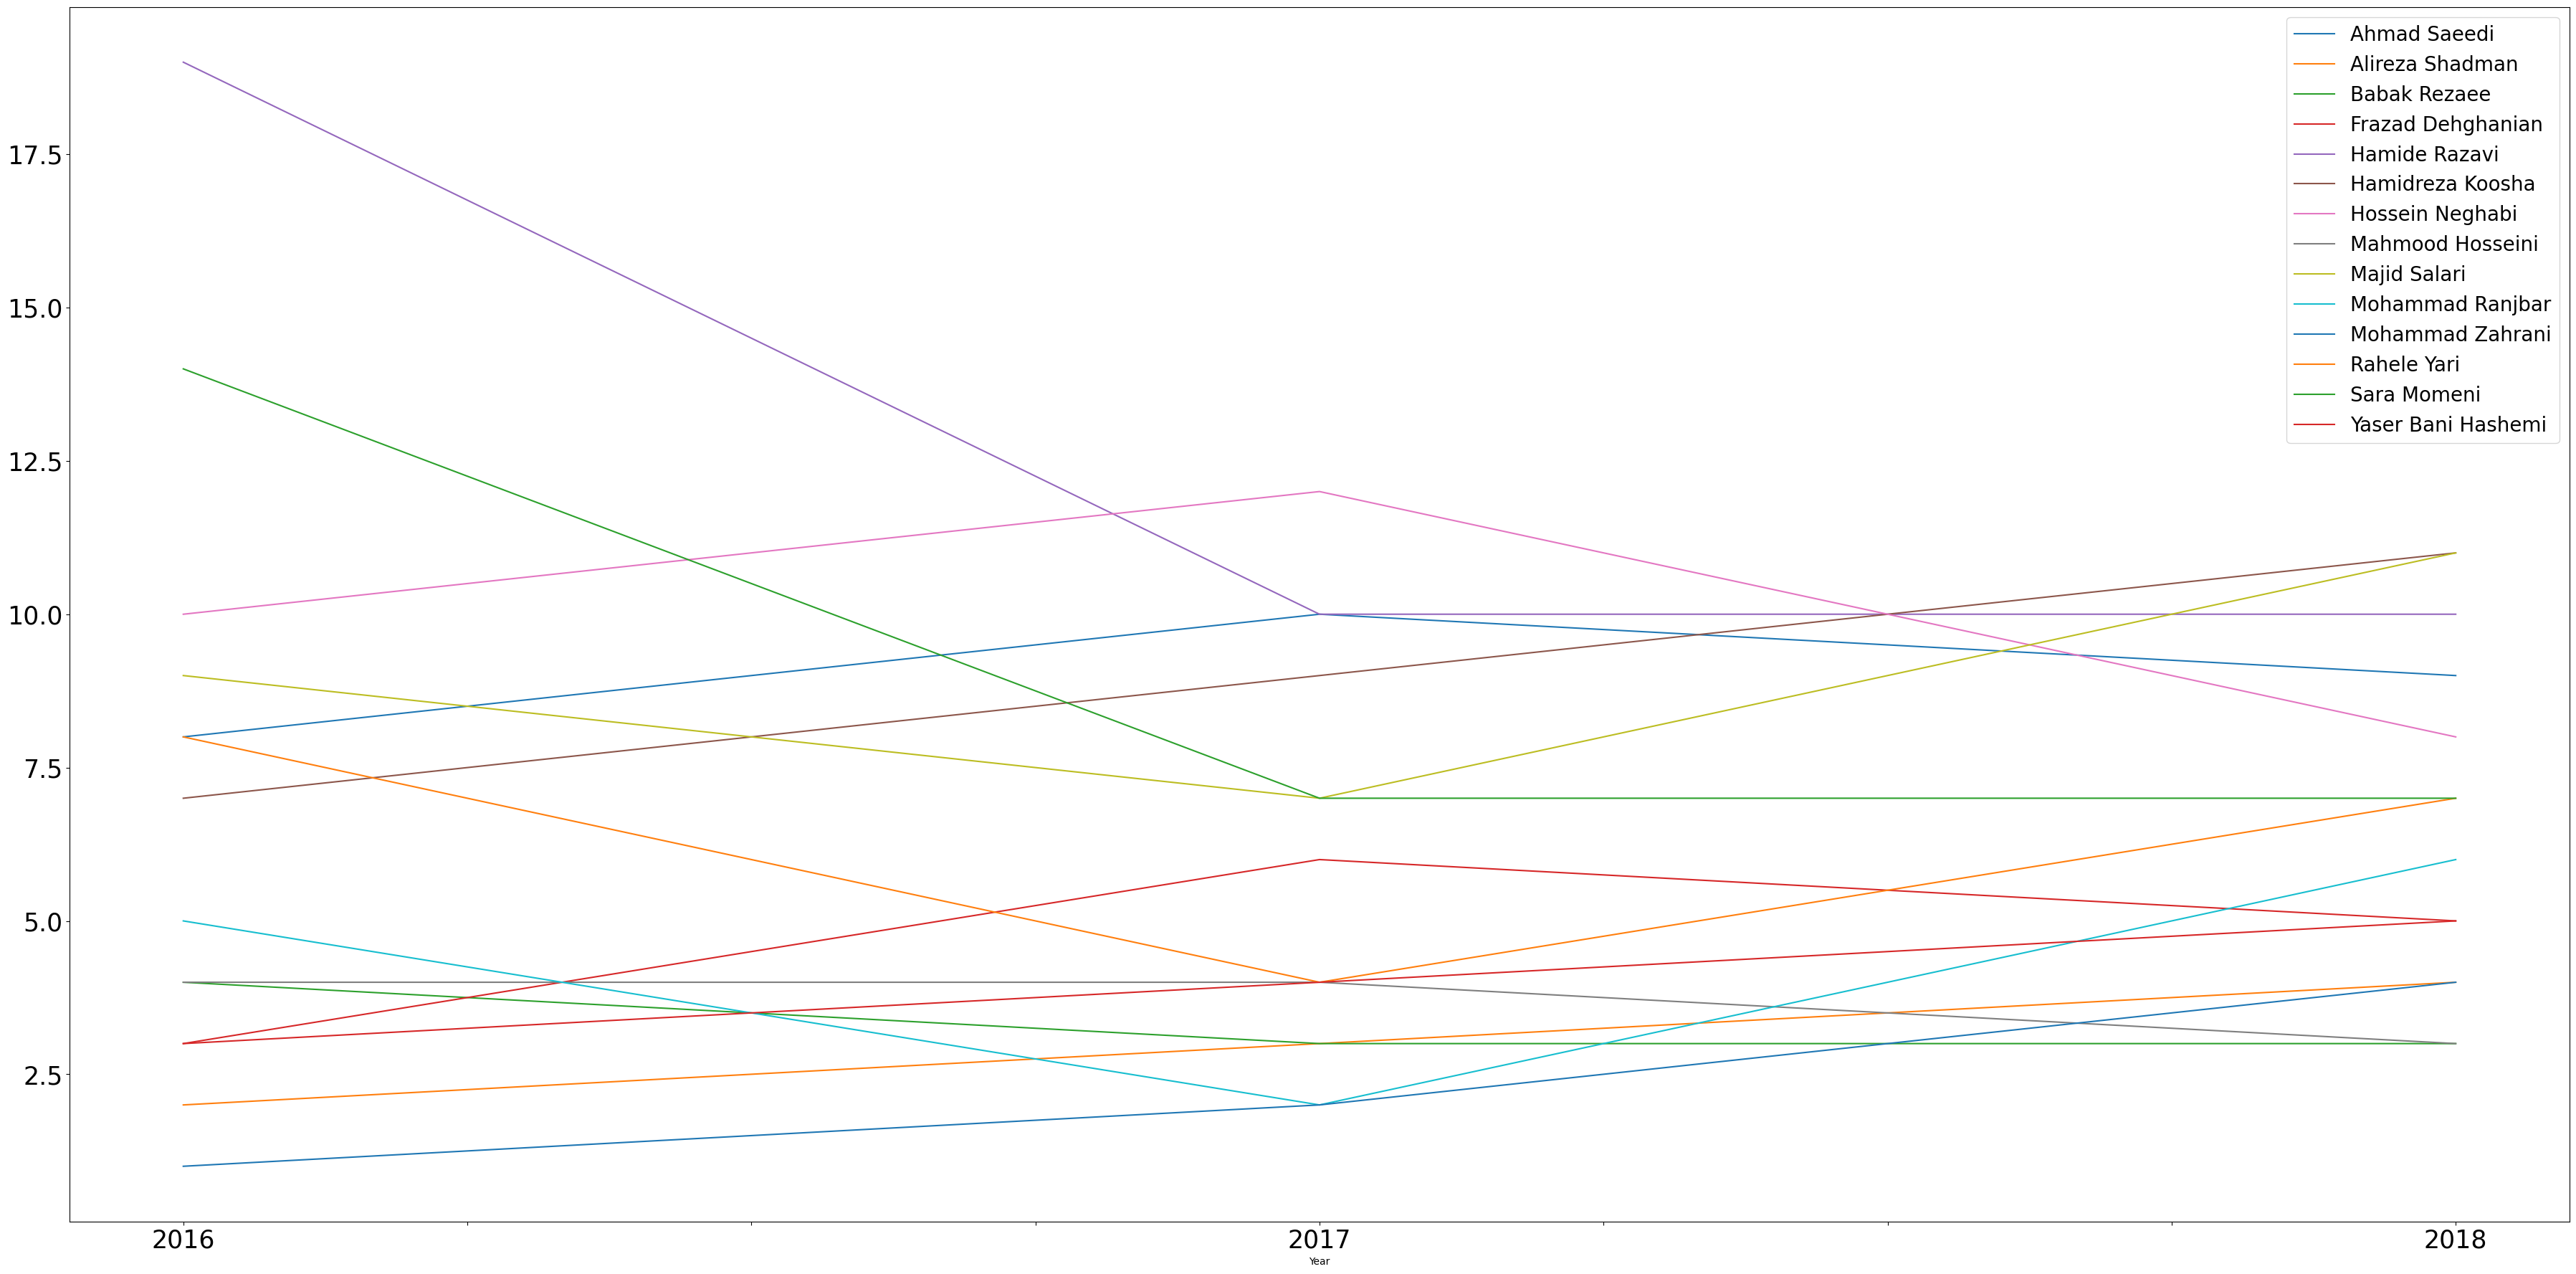

In [7]:
teacher_of_each_student = stu_supervisor.merge(professors, left_on="Supervisor_ID", right_on="Prof_ID")
student_per_year = teacher_of_each_student.merge(students, left_on="Stu_ID", right_on="Stu_ID")
student_per_year["Approval_Date"] = pd.to_datetime(student_per_year["Approval_Date"])
student_per_year["Year"] = student_per_year["Approval_Date"].dt.year
x = pd.DataFrame(student_per_year[["Prof_Name", "Year"]].groupby(["Prof_Name", "Year"]).size(), columns=["Count"])
x = student_per_year.merge(x, left_on=("Prof_Name", "Year"), right_on=("Prof_Name","Year"))
x = x[["Prof_Name", "Year", "Count"]].drop_duplicates()
x = x.pivot(index = "Year", columns="Prof_Name", values="Count").fillna(0)
x.index = x.index.astype(str)
x.plot(kind = "line", figsize = (45,22), fontsize = 25, legend = False)
plt.legend(prop={'size': 20})

<h3 align = "center">Output-2</h3>

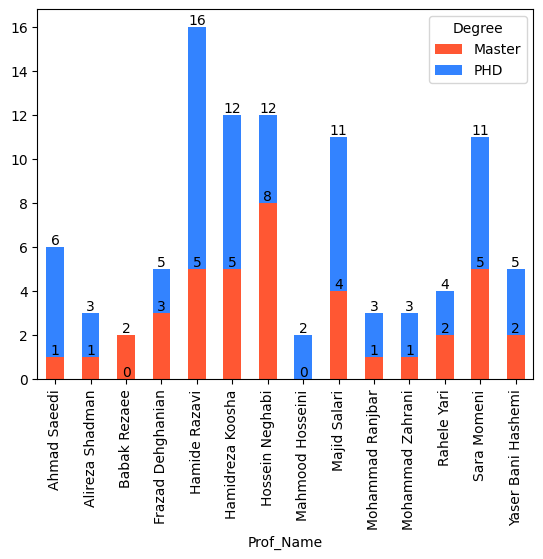

In [8]:
current_stu = students[students["Defense_Date"].isna()]
current_stu = current_stu.merge(stu_supervisor)
current_stu = current_stu.merge(professors, left_on="Supervisor_ID", right_on="Prof_ID")[["Stu_ID", "Degree", "Prof_Name"]]
x = pd.DataFrame(current_stu.groupby(["Prof_Name", "Degree"]).size(), columns=["Count"])
x = current_stu.merge(x, left_on=("Prof_Name", "Degree"), right_on=("Prof_Name","Degree"))
x = x[["Prof_Name", "Degree", "Count"]].drop_duplicates()
x = x.pivot(index = "Prof_Name", columns="Degree", values= "Count")
x = x.plot(kind = "bar", stacked=True, rot = 90, color = ["#FF5733", "#3383FF"])
for container in x.containers:
    x.bar_label(container, size=10)


<h3 align = "center">Output-3</h3>

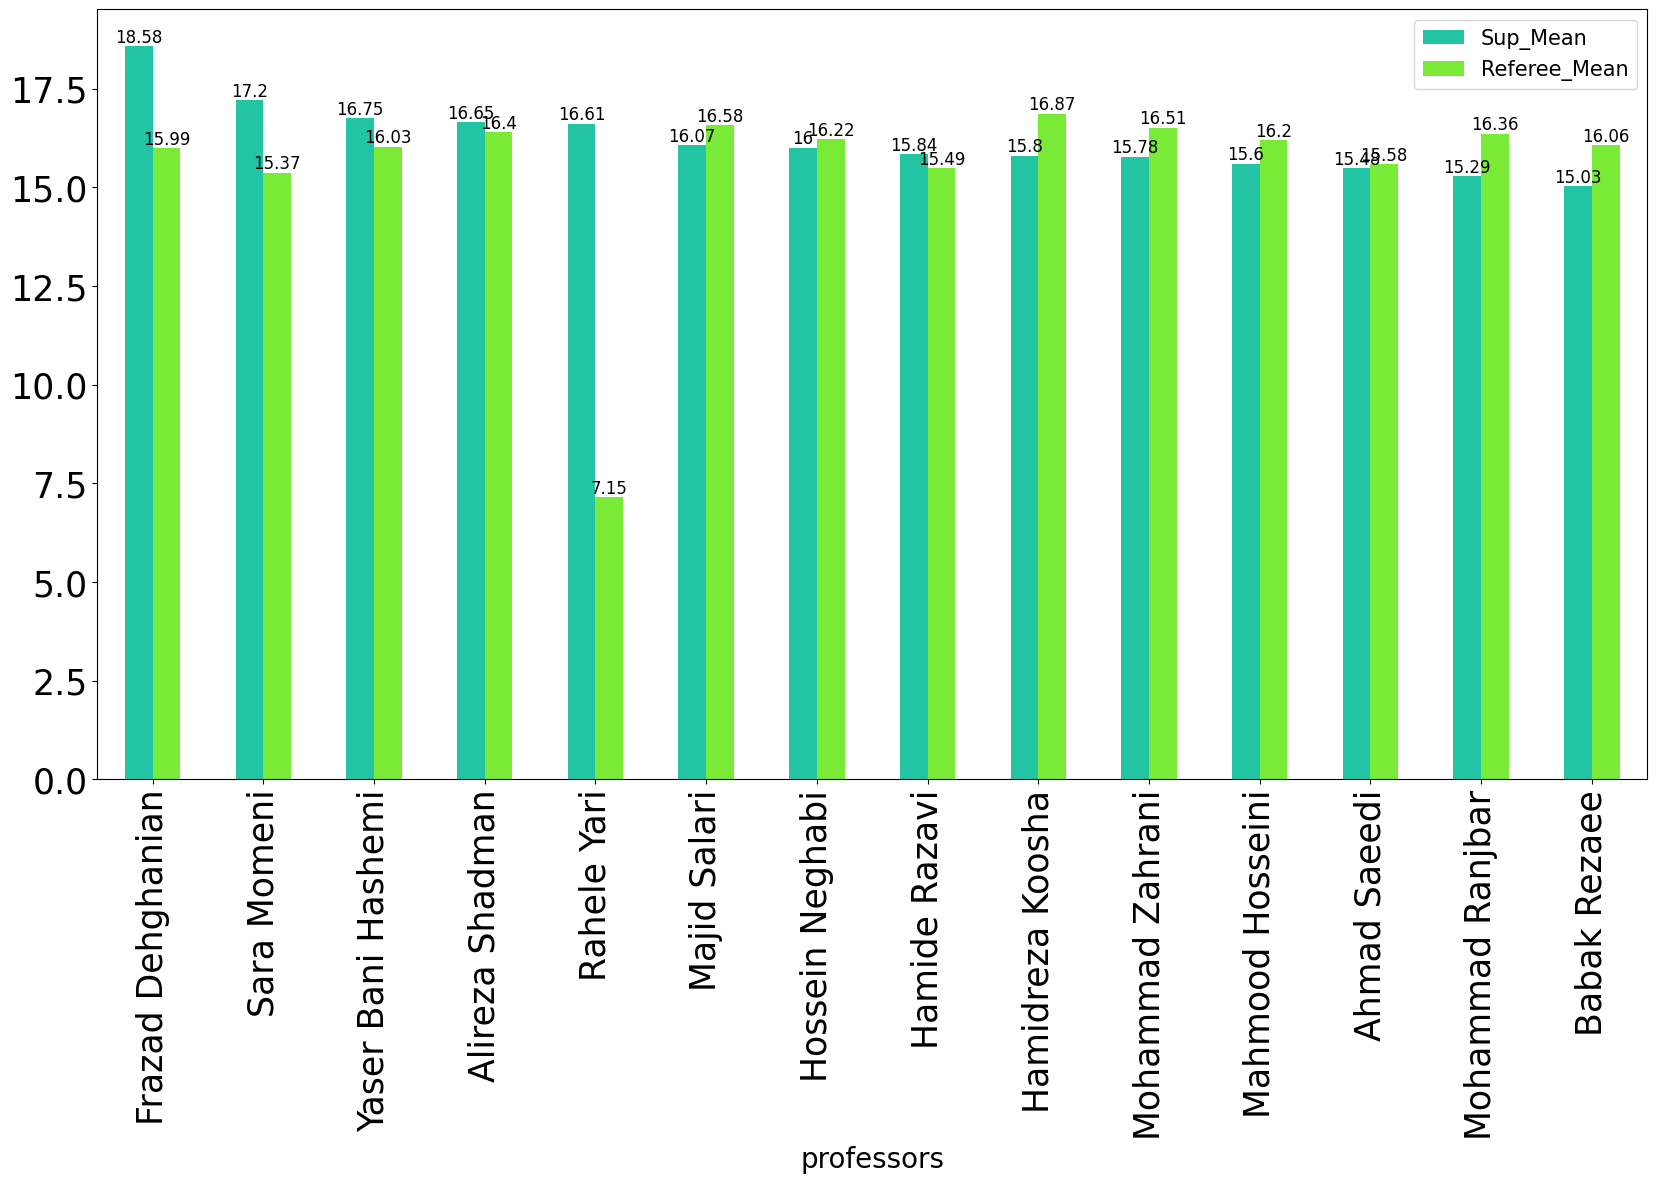

In [9]:
masters = students[(students["Degree"]=="Master") & (students["Grade"].notna())][["Stu_ID","Grade"]]
masters = masters.merge(stu_supervisor)
sup_prof = masters.merge(professors, left_on="Supervisor_ID", right_on="Prof_ID")
sup_prof = sup_prof.groupby("Prof_Name").mean(numeric_only = True)
sup_prof = sup_prof[["Grade"]].rename(columns = {"Grade":"Sup_Mean"})
p1_prof = masters.merge(professors, left_on="Prof_1", right_on="Prof_ID")
p1_prof = p1_prof.groupby("Prof_Name").mean(numeric_only = True)
p1_prof = p1_prof[["Grade"]].rename(columns = {"Grade":"P1_Mean"})
p2_prof = masters.merge(professors, left_on="Prof_2", right_on="Prof_ID")
p2_prof = p2_prof.groupby("Prof_Name").mean(numeric_only = True)
p2_prof = p2_prof[["Grade"]].rename(columns = {"Grade":"P2_Mean"})
concat = sup_prof.join(p1_prof).join(p2_prof)
concat.fillna(0, inplace=True)
concat = concat.assign(Referee_Mean = lambda df : round((df["P1_Mean"] + df["P2_Mean"])/2, 2))
concat = concat[["Sup_Mean", "Referee_Mean"]]
concat["Sup_Mean"] = round(concat["Sup_Mean"],2)
x = concat.sort_values(by = ["Sup_Mean"], ascending = False).plot(kind = "bar",figsize = (20,10), fontsize = 25, legend = True,
                                                             color = ["#22C4A4", "#79EA35"])
plt.legend(prop={'size': 15})
plt.xlabel("professors", fontsize = 20)
for container in x.containers:
    x.bar_label(container, size=12)

<h3 align = "center">Output-4</h3>

Text(0, 0.5, 'PHD')

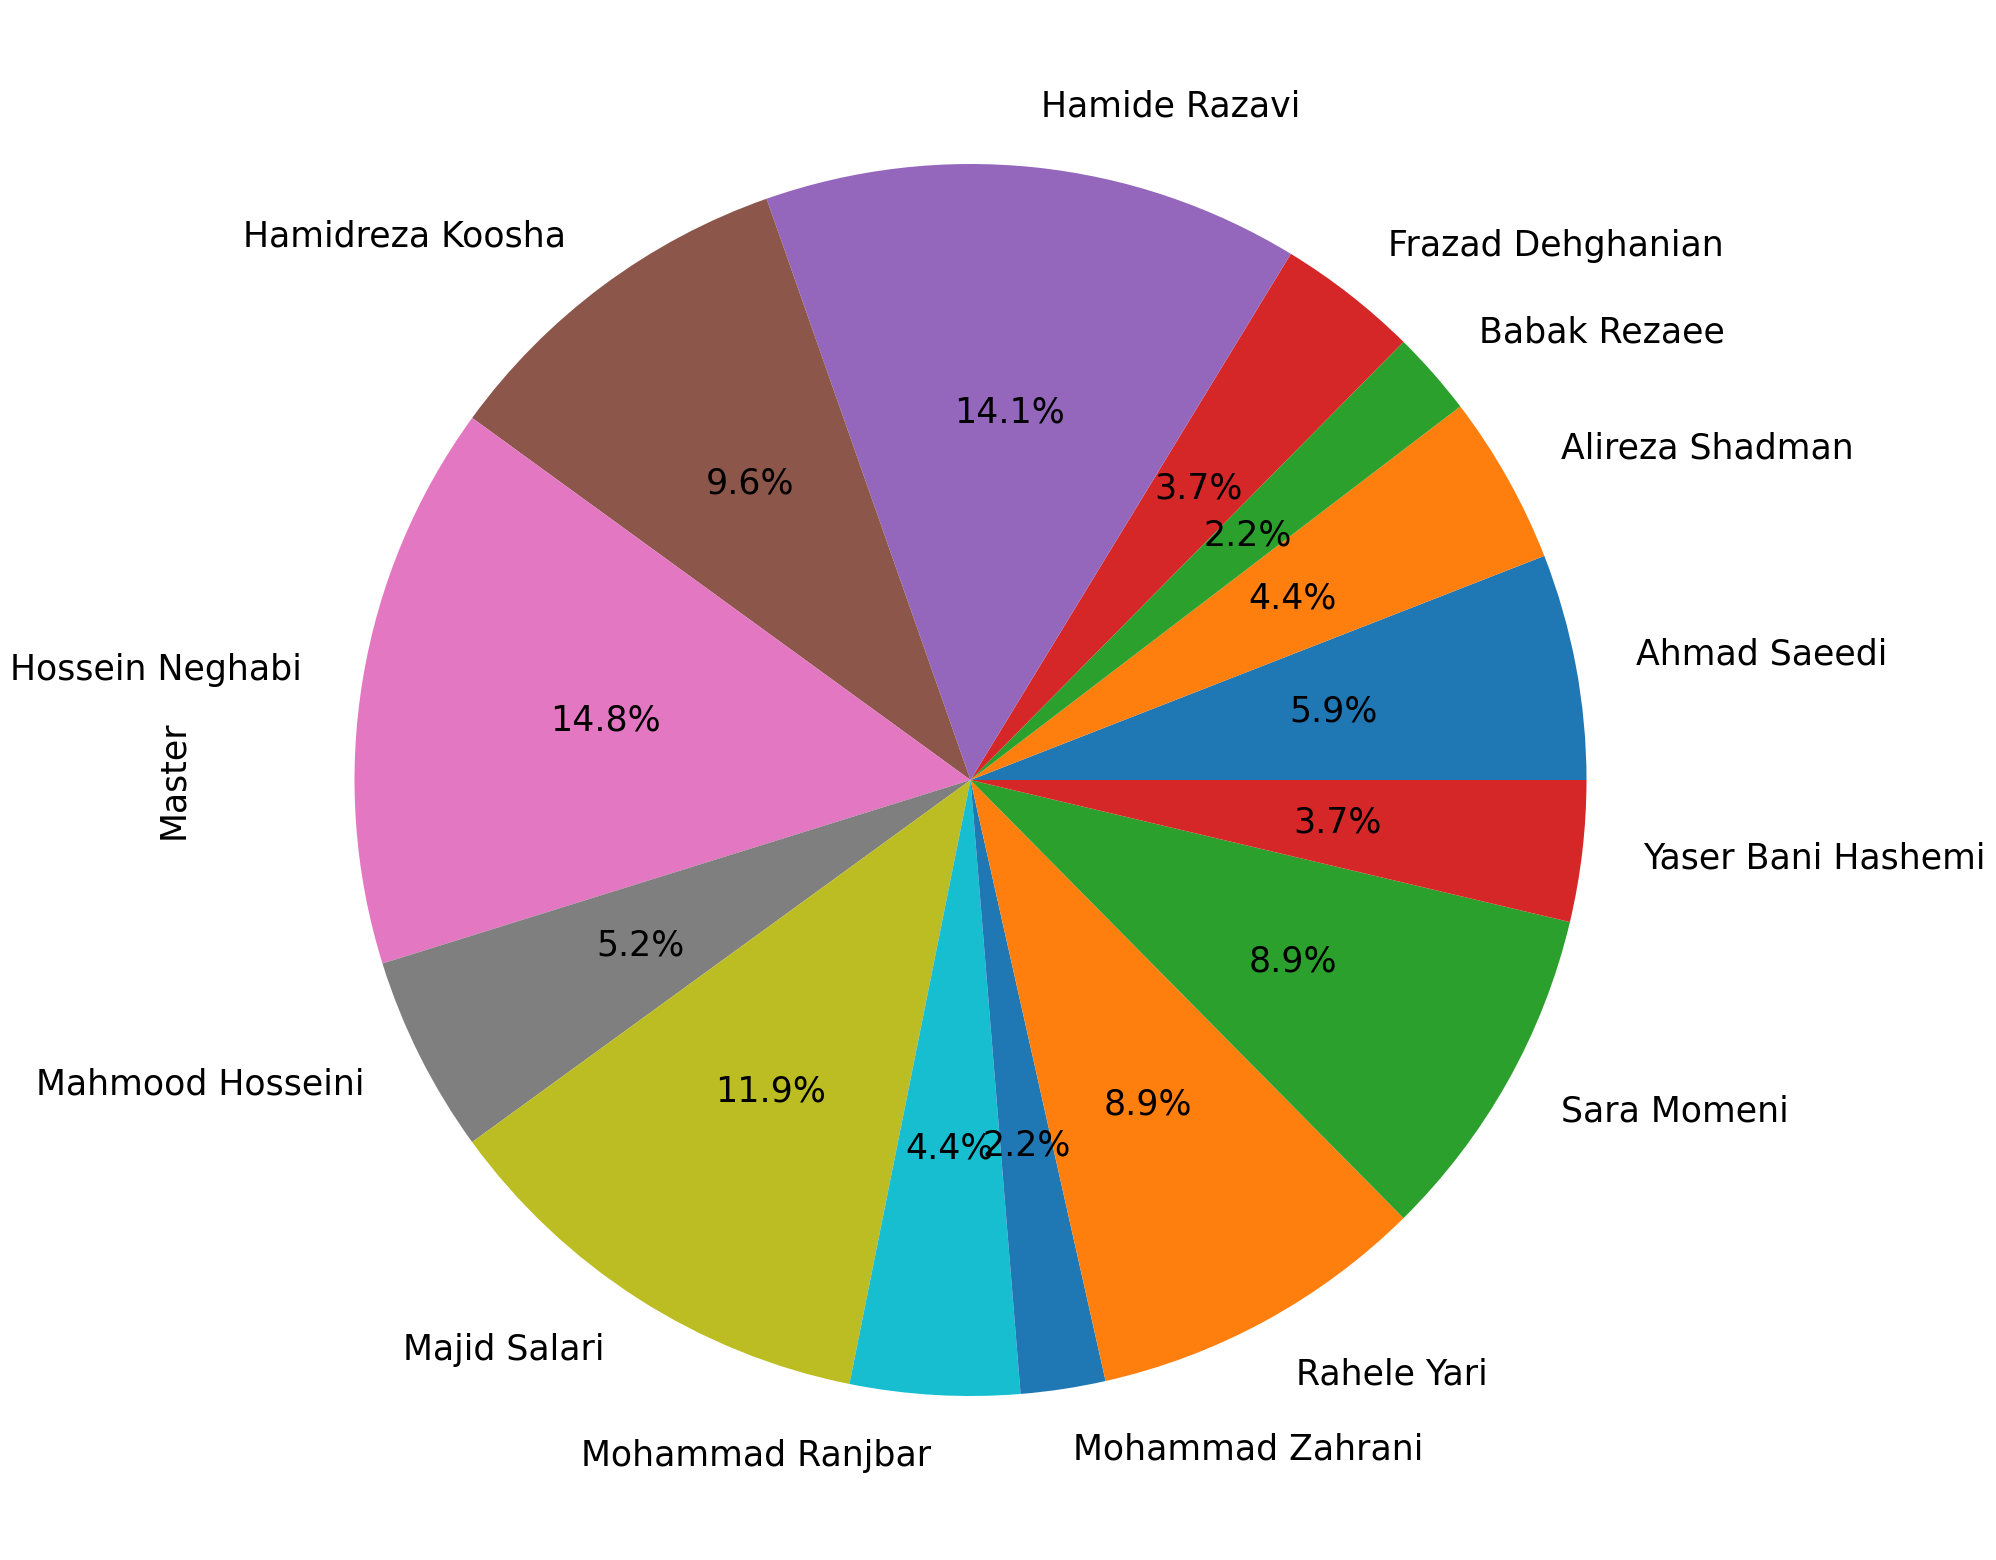

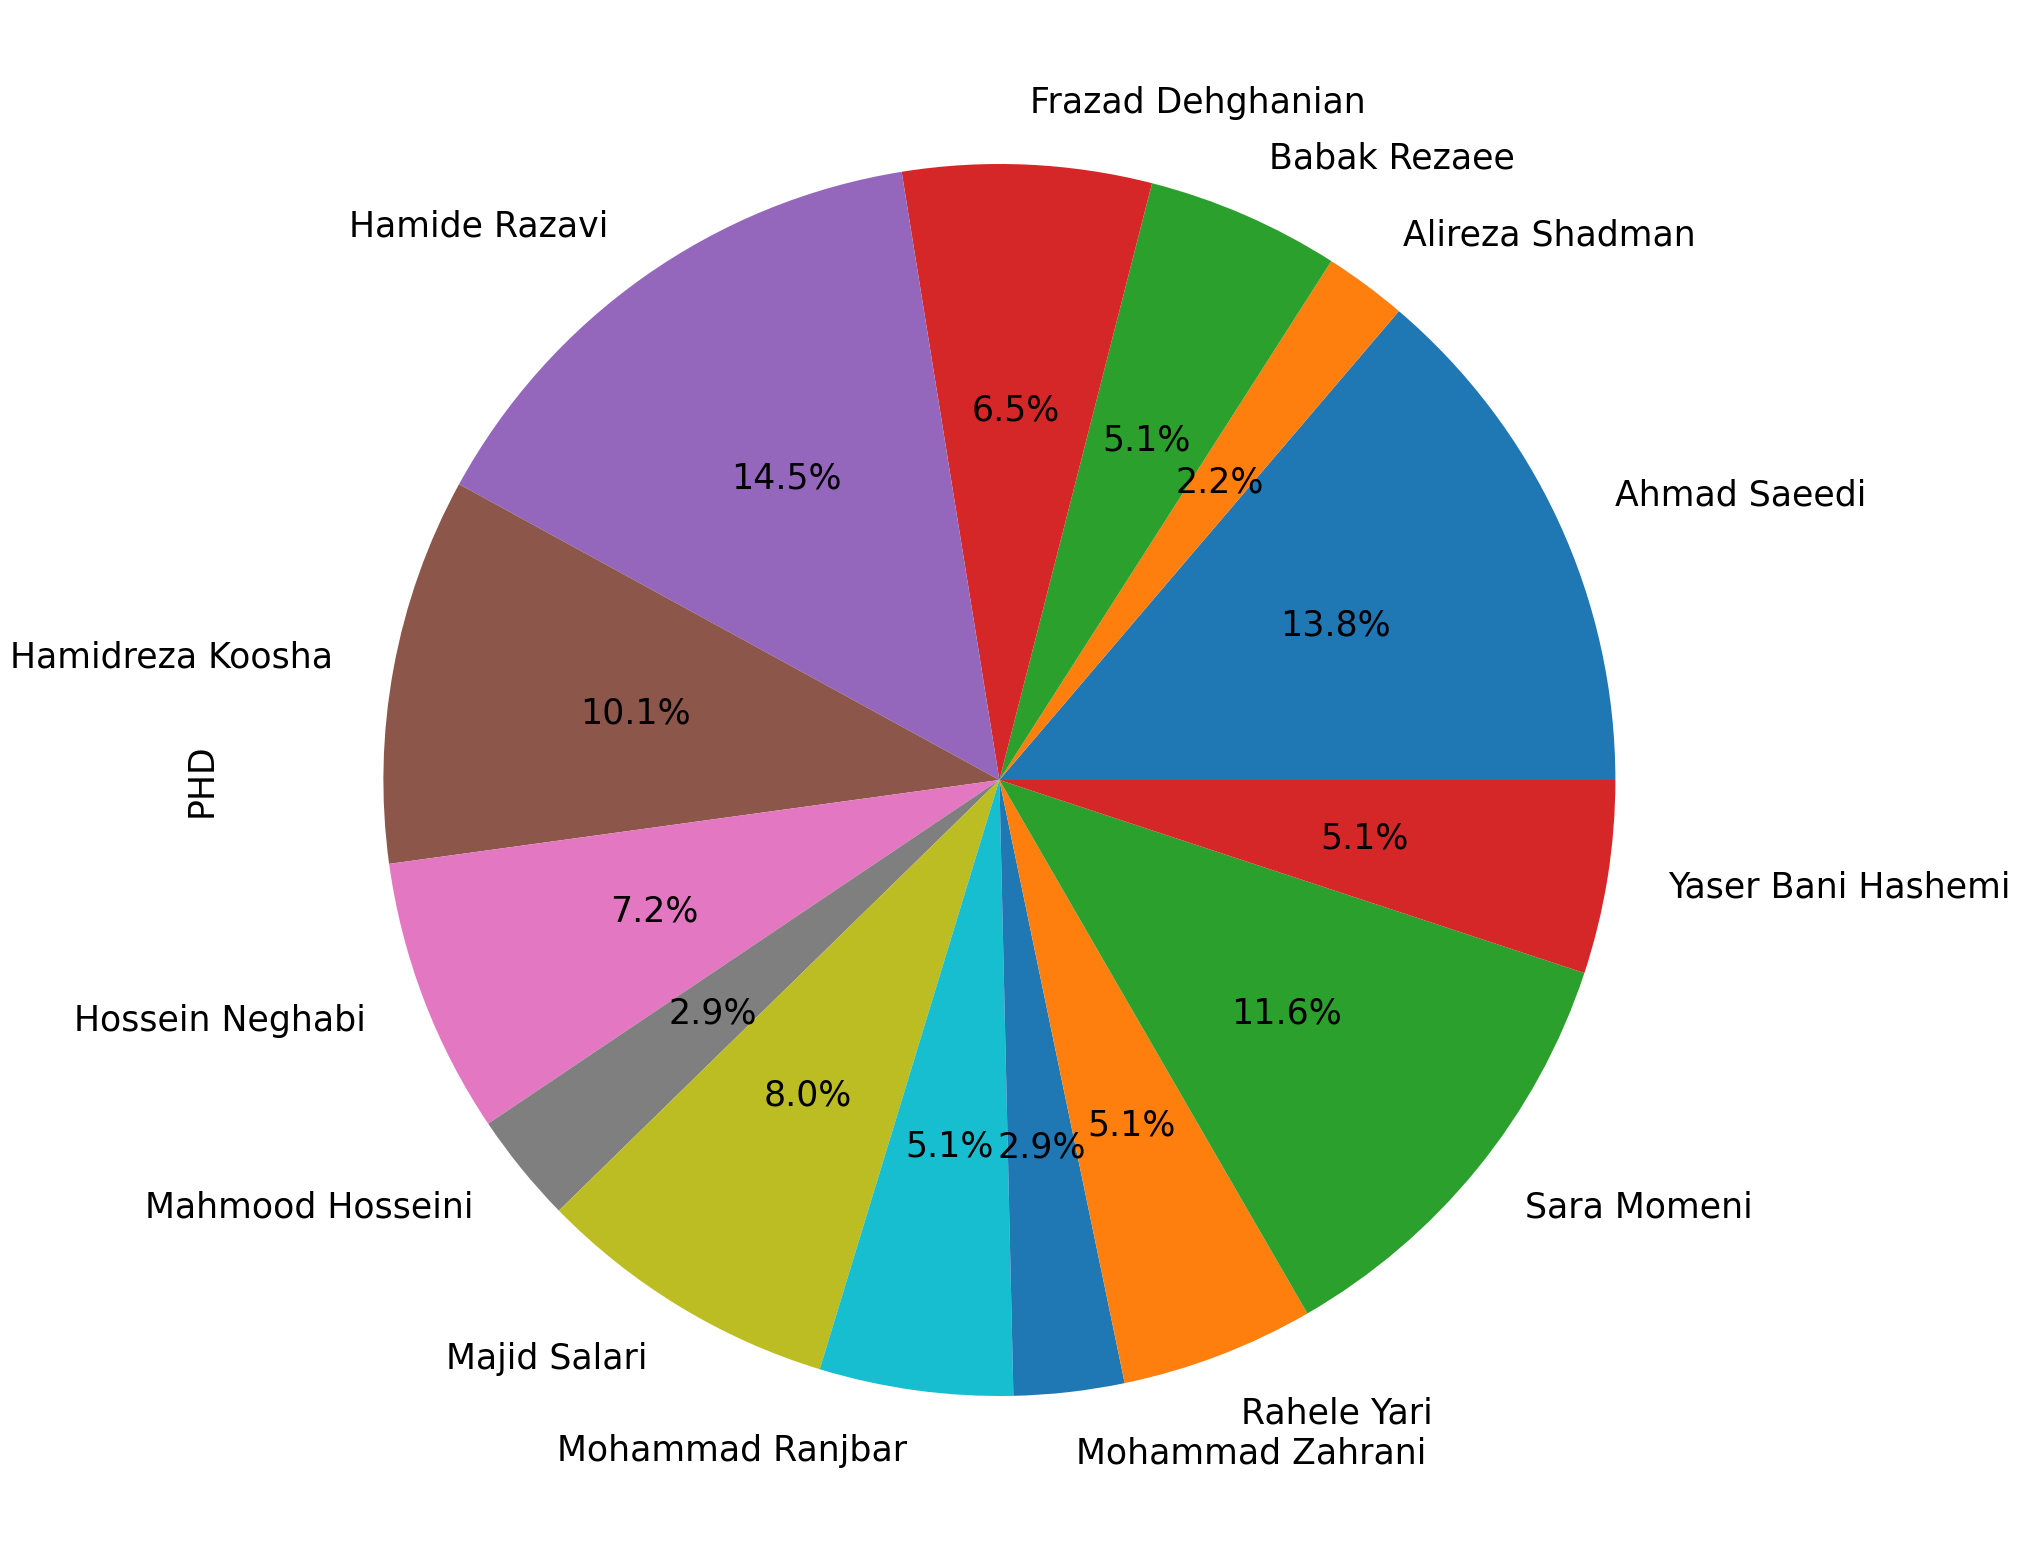

In [10]:
m = students.merge(stu_supervisor)
m = m.merge(professors, left_on="Supervisor_ID", right_on="Prof_ID")[["Stu_ID", "Degree", "Prof_Name"]]
x = pd.DataFrame(m.groupby(["Prof_Name", "Degree"]).size(), columns=["Count"])
x = m.merge(x, left_on=("Prof_Name", "Degree"), right_on=("Prof_Name","Degree"))
x = x[["Prof_Name", "Degree", "Count"]].drop_duplicates()
x = x.pivot(index="Prof_Name", columns=["Degree"], values=["Count"])
x1 = pd.DataFrame(x[("Count", "Master")])
x2 = pd.DataFrame(x[("Count", "PHD")])
x1.plot(kind = "pie", subplots = True, figsize=(20, 20), legend = False, autopct='%1.1f%%', fontsize = 25)
plt.ylabel("Master", fontsize = 25)
x2.plot(kind = "pie", subplots = True, figsize=(20, 20), legend = False, autopct='%1.1f%%', fontsize = 25)
plt.ylabel("PHD", fontsize = 25)

<h3 align = "center">Output-5</h3>

In [11]:
graduated_stu = students[students["Grade"].notna()]
graduated_stu = graduated_stu[graduated_stu["Stu_ID"].str.startswith("98")]

graduated_stu["Scale"] = (graduated_stu["Defense_Date"] - graduated_stu["Approval_Date"])/ pd.Timedelta(days=1)
print(graduated_stu.sort_values(by="Scale", ascending=True).head(5).to_string(index = False))
print()
print(graduated_stu.sort_values(by="Grade", ascending=False).head(5).to_string(index = False))

    Stu_ID      Stu_Name Degree    Thesis_Topic Approval_Date Defense_Date  Grade  Scale
9822744042 Emadi            PHD        Logistic    2018-12-20   2021-04-12  19.97  844.0
9822744047 Asadi            PHD     Fuzzy Logic    2018-09-23   2021-10-26  19.60 1129.0
9812743139        Abhari    PHD     Fuzzy Logic    2018-07-16   2021-09-13  12.89 1155.0
9822744063       Moosavi Master Project Control    2017-12-11   2021-02-26  12.25 1173.0
9822744048 Arbabi           PHD Project Control    2018-08-22   2021-11-08  16.83 1174.0

    Stu_ID      Stu_Name Degree   Thesis_Topic Approval_Date Defense_Date  Grade  Scale
9822744042 Emadi            PHD       Logistic    2018-12-20   2021-04-12  19.97  844.0
9822744060    Ghafoorian Master Queuing Theory    2016-05-13   2022-06-06  19.77 2215.0
9822744045 Ershadi Nasab Master     Simulation    2016-05-01   2021-04-09  19.61 1804.0
9822744047 Asadi            PHD    Fuzzy Logic    2018-09-23   2021-10-26  19.60 1129.0
9812744040     Mohammadi 

<h3 align = "center">Output-6</h3>

In [12]:
without_supervisor = students.merge(stu_supervisor, indicator=True, how="outer")
print(without_supervisor[["Stu_ID", "Stu_Name"]][without_supervisor["_merge"]=="left_only"].to_string(index = False))

    Stu_ID Stu_Name
9622744130  Dehnavi
9622744131  Dehnavi
9622744132   Aghasi
9622744133   Jalili
9622744134  Dehghan
9622744135   Ahmadi
9622744136  Dehnavi
9622744137   Arbabi
9622744138    Emadi
9622744139   Ahmadi
9622744140   Aghasi
9622744141    Zabet
9622744142 Milani  
9622744143 Saghafi 
9622744144 Saadat  
9622744145 Zabet   
9622744146 Ramezani
9622744147 Ahmadi  
9622744148 Mehraban
9622744149 Ramezani
9622744150 Zabet   
9622744151 Dehnavi 
9622744152 Tayebbi 
9622744153 Asaee   
9622744154 Noori   
9622744155 Akrami  


<h3 align = "center">Output-7</h3>

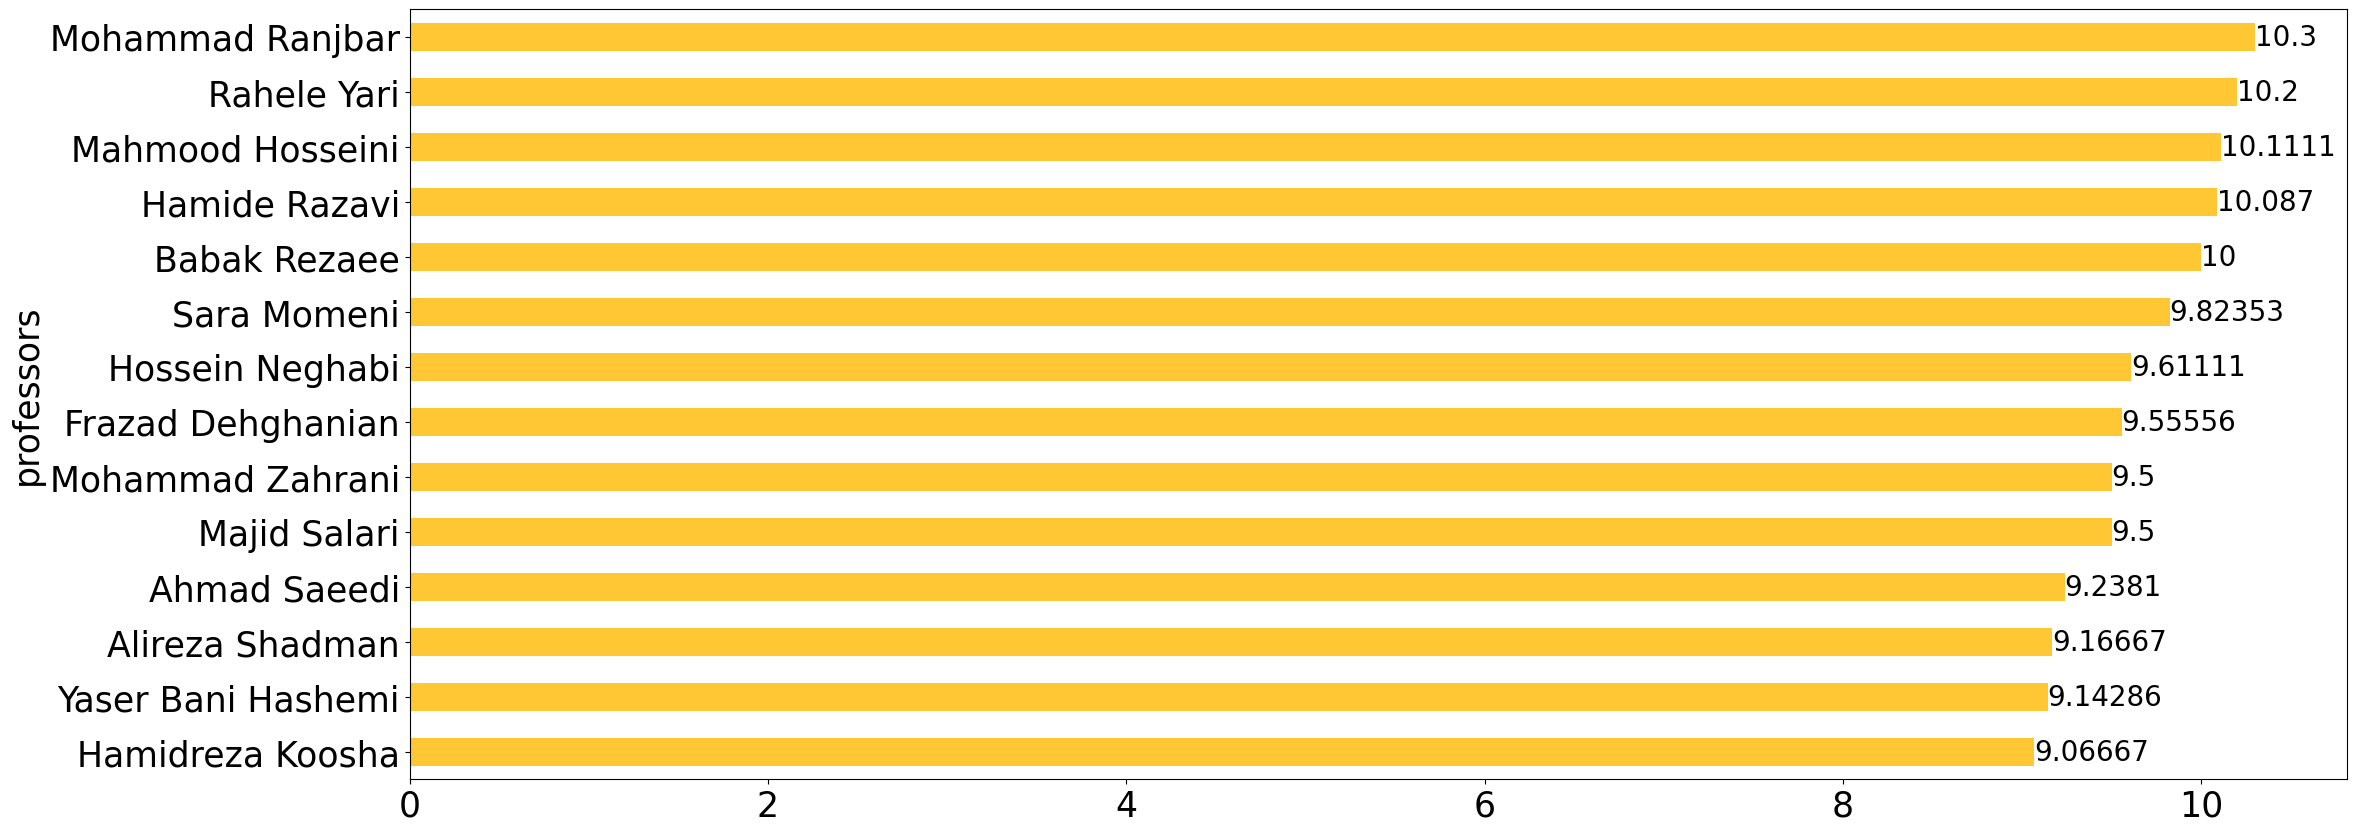

In [13]:
graduated = students[students["Grade"].notna()]
graduated = graduated.merge(stu_supervisor)
graduated = graduated.merge(professors, left_on="Supervisor_ID", right_on="Prof_ID")
graduated["Terms"] = ((graduated["Defense_Date"] - graduated["Approval_Date"]) / pd.Timedelta(days=1))/180
graduated["Terms"] = graduated["Terms"].apply(np.ceil)
output1 = graduated.groupby(
    "Prof_Name").mean(numeric_only=True)["Terms"]
x = output1.sort_values(ascending=True).plot.barh(
    color="#FFC733", figsize=(25, 10), fontsize=25)
plt.ylabel("professors", fontsize=25)
for container in x.containers:
    x.bar_label(container, size=20)


In [14]:
out_excel = pd.DataFrame(output1)
out_excel["Graduated_Stu_No"] = graduated.groupby("Prof_Name").count()["Terms"]
curr = students[students["Defense_Date"].isna()]
curr = curr.merge(stu_supervisor)
curr = curr.merge(professors, left_on="Supervisor_ID", right_on="Prof_ID")[["Prof_Name", "Stu_ID"]]
curr = pd.DataFrame(curr.groupby(["Prof_Name"]).size(), columns=["Current_Stu_No"])
out_excel["Current_Stu_No"] = curr["Current_Stu_No"]

ref1 = students[students["Defense_Date"].notna()]
ref1 = ref1.merge(stu_supervisor)
ref1 = ref1.merge(professors, left_on="Prof_1", right_on="Prof_ID")[["Prof_Name", "Stu_ID"]]
ref1 = pd.DataFrame(ref1.groupby(["Prof_Name"]).size(), columns=["Prof_1"])

ref2 = students[students["Defense_Date"].notna()]
ref2 = ref2.merge(stu_supervisor)
ref2 = ref2.merge(professors, left_on="Prof_2", right_on="Prof_ID")[["Prof_Name", "Stu_ID"]]
ref2 = pd.DataFrame(ref2.groupby(["Prof_Name"]).size(), columns=["Prof_2"])

ref1 = ref1.assign(Total_Referee = lambda x: ref1["Prof_1"] + ref2["Prof_2"])

out_excel["Total_Referee"] = ref1["Total_Referee"]
out_excel =out_excel.rename(columns={"Terms":"میانگین سنوات", "Current_Stu_No":"تعداد دانشجویان جاری", "Graduated_Stu_No":"تعداد دانش آموختگان",
                     "Total_Referee": "تعداد داوری های انجام شده"})
out_excel_2 = graduated[graduated["Terms"]>6][["Stu_ID", "Stu_Name", "Degree", "Grade", "Terms"]]

with pd.ExcelWriter('Report.xlsx') as writer:  
    out_excel.to_excel(writer, sheet_name='sheet1')
with pd.ExcelWriter('Report.xlsx', engine='openpyxl', mode='a') as writer:  
    out_excel_2.to_excel(writer, sheet_name='sheet2', index=False)